In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Get_gradient(nn.Module):
    def __init__(self):
        super(Get_gradient, self).__init__()
        kernel_v = [[0, -1, 0], 
                    [0, 0, 0], 
                    [0, 1, 0]]
        kernel_h = [[0, 0, 0], 
                    [-1, 0, 1], 
                    [0, 0, 0]]
        kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_h = nn.Parameter(data = kernel_h, requires_grad = False)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x0 = x[:, 0]
        x1 = x[:, 1]
        x2 = x[:, 2]
        x0_v = F.conv2d(x0.unsqueeze(1), self.weight_v, padding=2)
        x0_h = F.conv2d(x0.unsqueeze(1), self.weight_h, padding=2)

        x1_v = F.conv2d(x1.unsqueeze(1), self.weight_v, padding=2)
        x1_h = F.conv2d(x1.unsqueeze(1), self.weight_h, padding=2)

        x2_v = F.conv2d(x2.unsqueeze(1), self.weight_v, padding=2)
        x2_h = F.conv2d(x2.unsqueeze(1), self.weight_h, padding=2)

        x0 = torch.sqrt(torch.pow(x0_v, 2) + torch.pow(x0_h, 2) + 1e-6)
        x1 = torch.sqrt(torch.pow(x1_v, 2) + torch.pow(x1_h, 2) + 1e-6)
        x2 = torch.sqrt(torch.pow(x2_v, 2) + torch.pow(x2_h, 2) + 1e-6)

        x = torch.cat([x0, x1, x2], dim=1)
        return x

class Get_gradient_nopadding(nn.Module):
    def __init__(self):
        super(Get_gradient_nopadding, self).__init__()
        kernel_v = [[0, -1, 0], 
                    [0, 0, 0], 
                    [0, 1, 0]]
        kernel_h = [[0, 0, 0], 
                    [-1, 0, 1], 
                    [0, 0, 0]]
        kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_h = nn.Parameter(data = kernel_h, requires_grad = False)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x0 = x[:, 0]
        x1 = x[:, 1]
        x2 = x[:, 2]
        x0_v = F.conv2d(x0.unsqueeze(1), self.weight_v, padding = 1)
        x0_h = F.conv2d(x0.unsqueeze(1), self.weight_h, padding = 1)

        x1_v = F.conv2d(x1.unsqueeze(1), self.weight_v, padding = 1)
        x1_h = F.conv2d(x1.unsqueeze(1), self.weight_h, padding = 1)

        x2_v = F.conv2d(x2.unsqueeze(1), self.weight_v, padding = 1)
        x2_h = F.conv2d(x2.unsqueeze(1), self.weight_h, padding = 1)

        x0 = torch.sqrt(torch.pow(x0_v, 2) + torch.pow(x0_h, 2) + 1e-6)
        x1 = torch.sqrt(torch.pow(x1_v, 2) + torch.pow(x1_h, 2) + 1e-6)
        x2 = torch.sqrt(torch.pow(x2_v, 2) + torch.pow(x2_h, 2) + 1e-6)

        x = torch.cat([x0, x1, x2], dim=1)
        return x

In [3]:
kernel_v = [[0, -1, 0], 
            [0, 0, 0], 
            [0, 1, 0]]
kernel_h = [[0, 0, 0], 
            [-1, 0, 1], 
            [0, 0, 0]]
print(len(kernel_v))
print(torch.FloatTensor(kernel_h).shape)
kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
print(kernel_h.shape)
kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)

3
torch.Size([3, 3])
torch.Size([1, 1, 3, 3])


In [4]:
input = torch.randn(1,3,20,20)

get_grad = Get_gradient()

output = get_grad(input)
print(output.shape)

get_no_grad = Get_gradient_nopadding()
output_no_grad = get_no_grad(input)
print(output_no_grad.shape)

torch.Size([1, 3, 22, 22])
torch.Size([1, 3, 20, 20])


# 适用于处理灰度图的模型

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Get_gradient_gray(nn.Module):
    def __init__(self):
        super(Get_gradient_gray, self).__init__()
        kernel_v = [[0, -1, 0], 
                    [0, 0, 0], 
                    [0, 1, 0]]
        kernel_h = [[0, 0, 0], 
                    [-1, 0, 1], 
                    [0, 0, 0]]
        kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_h = nn.Parameter(data = kernel_h, requires_grad = False)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x_v = F.conv2d(x, self.weight_v, padding=2)
        x_h = F.conv2d(x, self.weight_h, padding=2)
        x = torch.sqrt(torch.pow(x_v, 2) + torch.pow(x_h, 2) + 1e-6)

        return x

class Get_gradient_same(nn.Module):
    def __init__(self):
        super(Get_gradient_same, self).__init__()
        kernel_v = [[0, -1, 0], 
                    [0, 0, 0], 
                    [0, 1, 0]]
        kernel_h = [[0, 0, 0], 
                    [-2, 0, 2], 
                    [0, 0, 0]]
        kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_h = nn.Parameter(data = kernel_h, requires_grad = False)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x_v = F.conv2d(x, self.weight_v, padding=1)
        x_h = F.conv2d(x, self.weight_h, padding=1)
        x = torch.sqrt(torch.pow(x_v, 2) + torch.pow(x_h, 2) + 1e-6)
        return x
    
class Get_gradient_same_h(nn.Module):
    def __init__(self):
        super(Get_gradient_same_h, self).__init__()
        kernel_v = [[0, -1, 0], 
                    [0, 0, 0], 
                    [0, 1, 0]]
        kernel_h = [[0, 0, 0], 
                    [-1, 0, 1], 
                    [0, 0, 0]]
        kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_h = nn.Parameter(data = kernel_h, requires_grad = False)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x_v = F.conv2d(x, self.weight_v, padding=1)
        x_h = F.conv2d(x, self.weight_h, padding=1)
        x = torch.sqrt(torch.pow(x_v, 2) + torch.pow(x_h, 2) + 1e-6)
        return x
    

In [30]:
input_gray = torch.randn(1,1,20,20)

get_grad = Get_gradient_gray()

output = get_grad(input_gray)
print(output.shape)

get_no_grad = Get_gradient_same()
output_no_grad = get_no_grad(input_gray)
print(output_no_grad.shape)

torch.Size([1, 1, 22, 22])
torch.Size([1, 1, 20, 20])


(479, 556, 3)
torch.Size([1, 1, 479, 556])


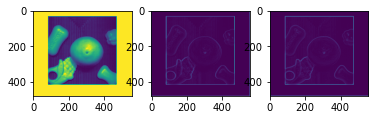

In [31]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_path = 'restored.png'
image = io.imread(img_path)
plt.subplot(1,3,1)
plt.imshow(image)
print(image.shape)

plt.imshow(image[:,:,0])

real = torch.FloatTensor(image[:,:,0]).unsqueeze(0).unsqueeze(0)
print(real.shape)

real_grad = get_no_grad(real)
plt.subplot(1,3,2)
plt.imshow(real_grad.squeeze())


get_grad_h = Get_gradient_same_h()

grad_h = get_grad_h(real)
plt.subplot(1, 3, 3)
plt.imshow(grad_h.squeeze())

# 垂直线检测器

In [19]:
class Get_gradient_vertical_full(nn.Module):
    def __init__(self):
        super(Get_gradient_vertical_full, self).__init__()
        kernel_v = [[-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]]

        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x_v = F.conv2d(x, self.weight_v, padding=1)
        x = x_v
        return x
    
class Get_gradient_vertical_partial(nn.Module):
    def __init__(self):
        super(Get_gradient_vertical_partial, self).__init__()
        kernel_v = [[0, 0, 0], 
                    [-1, 0, 1], 
                    [0, 0, 0]]

        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x_v = F.conv2d(x, self.weight_v, padding=1)
        x = x_v
        return x

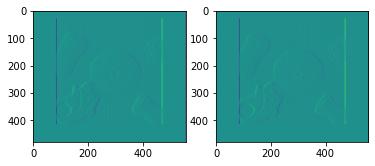

In [20]:
get_vertial_grad = Get_gradient_vertical_full()
vertial_grad = get_vertial_grad(real)
plt.subplot(1,2,1)
plt.imshow(vertial_grad.squeeze())

get_vertial_grad_partial = Get_gradient_vertical_partial()
vertical_grad_partial = get_vertial_grad_partial(real)
plt.subplot(1,2,2)
plt.imshow(vertical_grad_partial.squeeze())

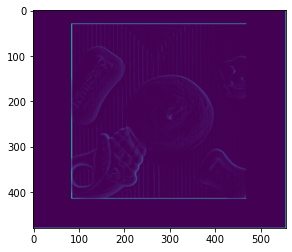

In [21]:
abc = real_grad - vertical_grad_partial
plt.imshow(abc.squeeze())

# 水平线检测器

In [22]:
class Get_gradient_horizental_full(nn.Module):
    def __init__(self):
        super(Get_gradient_horizental_full, self).__init__()
        kernel_v = [[-1, -1, -1], 
                    [0, 0, 0], 
                    [1, 1, 1]]

        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x_v = F.conv2d(x, self.weight_v, padding=1)
        x = x_v
        return x
    
class Get_gradient_horizental_partial(nn.Module):
    def __init__(self):
        super(Get_gradient_horizental_partial, self).__init__()
        kernel_v = [[0, -1, 0], 
                    [0, 0, 0], 
                    [0, 1, 0]]

        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_v = nn.Parameter(data = kernel_v, requires_grad = False)

    def forward(self, x):
        x_v = F.conv2d(x, self.weight_v, padding=1)
        x = x_v
        return x

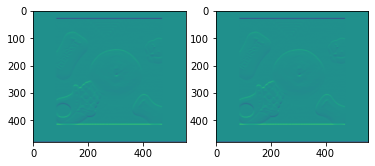

In [23]:
get_horizental_grad = Get_gradient_horizental_full()
horizental_grad = get_horizental_grad(real)
plt.subplot(1,2,1)
plt.imshow(horizental_grad.squeeze())

get_horizental_grad_partial = Get_gradient_horizental_partial()
horizental_grad_partial = get_horizental_grad_partial(real)
plt.subplot(1,2,2)
plt.imshow(horizental_grad_partial.squeeze())

# vertical + horizental

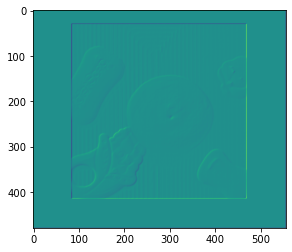

In [25]:
plt.imshow(0.6 * vertical_grad_partial.squeeze()  + 0.4 *horizental_grad_partial.squeeze())